# China Flows during the Covid-19  Outbreak

With the beginning of Q2 2020 the global economy finds itself adapting to an unprecedented situation brought on by the Covid-19 pandemic. Oil demand and supply has already been severely impacted across the world. In this notebook, we will see how [Vortexa's Python SDK](https://github.com/VorTECHsa/python-sdk) can help analysts, traders and data scientists identify the earliest flow trends related to **China**, in its capacity as a major global crude importer and clean products exporter.<br>

For the purposes of this analysis we will take advantage of the SDK's [CargoTimeSeries](https://vortechsa.github.io/python-sdk/endpoints/cargo_timeseries/) endpoint. This endpoint allows SDK users to find aggregate flows between regions and provinces, for various products, vessels or commercial entities such as charterers and vessel owners. To see more details about Endpoints check our [Docs page](https://vortechsa.github.io/python-sdk/endpoints/about-endpoints/). <BR>

**PS1**: This notebook was generated on 15 April 2020. Vortexa is constantly improving the quality of our data and models, and consequently some historical data points may change causing future runs of the notebook to yield different results.

**PS2**: The following packages were used:
* vortexasdk==0.14.0
* pandas==0.25.2
* matplotlib==3.1.2

Please note that `matplotlib` is not part of the default requirements of the SDK and therefore it needs to be installed prior to running the notebook. To install the library simply run `pip install -U matplotlib` or if you are using conda environment `conda install -c conda-forge matplotlib`.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from vortexasdk import CargoTimeSeries, Products, Geographies

pd.options.display.max_columns = None
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 100

# China Flows Exploration

We will study China flows starting from January 2018 until the end of March 2020. Note that the SDK provides access to Vortexa data since 2016-01-01 with a maximum date range of 4 years per query.

In [2]:
# Define filter limits, i.e. start and end date for this analysis. We will consider only historical (i.e. closed)
# movements. Given that the notebook was populated at mid April, we will then set our max date
# to the end of March 2020
START_DATE = datetime(2018, 1, 1)

# Make sure you include the whole day, i.e. since we want to include movements up to the end of March we should
# specify end date either as midnight of March 31st or 1st of April (if we used datetime(2020,3,31)) we would 
# lose essentially one whole day of movements
END_DATE = datetime(2020, 3, 31, 23, 59, 59)

# Define cargo unit for the timeseries (will be constant over the analysis)
TS_UNIT = 'bpd'

# Define the granularity of the timeseries (will be constant over the analysis)
TS_FREQ = 'month'

print('Start date: {}'.format(START_DATE))
print('End date: {}'.format(END_DATE))

Start date: 2018-01-01 00:00:00
End date: 2020-03-31 23:59:59


## China Crude Imports

In [3]:
# We want to search the ID that corresponds to the origin `China`.
china = [g.id for g in Geographies().search('china').to_list() if 'country' in g.layer]

# Check we've only got one ID for China
assert len(china) == 1

print('China polygon id: {}'.format(china[0]))

2020-04-15 12:25:12,810 vortexasdk.operations — INFO — Searching Geographies with params: {'term': ['china']}
2020-04-15 12:25:12,813 vortexasdk.client — INFO — Creating new VortexaClient
2020-04-15 12:25:12,956 vortexasdk.client — INFO — 13 Results to retreive. Sending 1 post requests in parallel using 6 threads.
China polygon id: 934c47f36c16a58d68ef5e007e62a23f5f036ee3f3d1f5f85a48c572b90ad8b2


At this point it is worth paying some attention to the `.search` method. Given a *term* argument the query will return all Geographies that match this term. Given the fact that one term can return multiple results we need to make sure we retrieve only the ID(s) we are interested for. In the case above we use the `layer` attribute to keep only the Geographies that are of `layer` country. To understand the different layers in Geographies check the [Geography Entries Docs](https://docs.vortexa.com/reference/intro-geography-entries). We will also illustrate with an example how the results would look if we didn't filter on country layer.

In [4]:
# This is just for illustration purposes
china_all = [(g.id, g.name, g.layer) for g in Geographies().search('china').to_list()]
china_all_df = pd.DataFrame(data = china_all, columns = ['id', 'name', 'layer'])
china_all_df

2020-04-15 12:25:13,378 vortexasdk.operations — INFO — Searching Geographies with params: {'term': ['china']}
2020-04-15 12:25:13,517 vortexasdk.client — INFO — 13 Results to retreive. Sending 1 post requests in parallel using 6 threads.


,id,name,layer
0,934c47f36c16a58d68ef5e007e62a23f5f036ee3f3d1f5f85a48c572b90ad8b2,China,[country]
1,781cacc7033f877caa4b4106d096b74afe006a96391bf5a56a4f55b849359a42,South China,[shipping_region]
2,a63890260e29d859390fd1a23c690181afd4bd152943a04c00cd6a5ecf3f7d1e,North China,[shipping_region]
3,b5fafce6e20de2dc307fb7e0b89978ee91a49a7b6ec6f5461daf2633f3c56674,China (excl. HK & Macau),[shipping_region]
4,9a021f43c397b175ddfff7a91d46ee6e6e16d37e9f9d52398ac6895656109d86,China Steel Chemical,[terminal]
5,4f5f0b6f433d65718e62b663e802d9e9f0ff9eba2a2b8dd4558ee94dfbf4d8a6,China Energy Services Ningbo,[terminal]
6,f192fa0cb55da8cdc2e658e9102af9ce632e0be358b0519aa75f0cb3b52fb739,East China Sea STS,[sts_zone]
7,404fd9f15f7b9bd3e4b2a838307b04dd991813fc9afc9e500d4af03c88fcb7ec,Multipurpose (China Merchants) Terminal,[terminal]
8,4988ec0894dd49ddc0e838325906013aa69125c8a93c04262456900a716e3137,"China Union, Freeport Of Monrovia",[terminal]
9,46bb424e5c7c951b4a85b38c747769ff8d3f1656ddfd51176f696b7e1941cc50,China Resources Chemical Holding Terminal,[terminal]


We will now search for the ID that corresponds to *Crude/Condensates* product. In the same manner as above we will use the product layer to ensure we retrieve the desired ID (although not necessary in this *specific* case since there is only one product with that name). To understand the different layers in Products check the [Product Entries Docs](https://docs.vortexa.com/reference/intro-product-entities).

In [5]:
# Find Crude/Condensates ID
crude = [p.id for p in Products().search('Crude/Condensates').to_list() if p.layer[0] == 'group']

# Check we've only got one Crude ID
assert len(crude) == 1

print('Crude id: {}'.format(crude[0]))

2020-04-15 12:25:13,901 vortexasdk.operations — INFO — Searching Products with params: {'term': ['Crude/Condensates'], 'ids': [], 'product_parent': [], 'allowTopLevelProducts': True}
Crude id: 54af755a090118dcf9b0724c9a4e9f14745c26165385ffa7f1445bc768f06f11


For all the following flow aggregations, **intra-movements** will be **excluded** from analysis. Intra-movements are defined as movements having their origin and destination to the same *geographic area* (e.g. if origin is a country intra-movements are defined as movements starting and finishing at the same country and the same goes for any other layer such as geographic region, trading region etc.). The `.search()` method of `CargoTimeSeries` object accepts an argument called `disable_geographic_exclusion_rules` which is set to None and by default **excludes** all intra-movements. To include intra-movements to aggregations use `disable_geographic_exclusion_rules=True`.

In [6]:
# Query API
df = CargoTimeSeries().search(
            # Filter on cargo arrival date (i.e. the date that the unloading operation started) 
            filter_activity = 'unloading_start',
            # We are interested in movements into China 
            filter_destinations = china,
            # Keep only Crude/Condensate movements
            filter_products = crude, 
            # Quantity unit to use
            timeseries_unit = TS_UNIT,
            # Look on monthly imports
            timeseries_frequency = TS_FREQ,
            # Uncomment to INCLUDE intra-movements to aggregations
            # disable_geographic_exclusion_rules = True,
            # Set the date range of analysis
            filter_time_min = START_DATE,
            filter_time_max = END_DATE).\
        to_df()

# Convert key column to datetime and set as index
df['key'] = pd.to_datetime(df['key']).dt.date
df = df.rename(columns = {'key': 'date', 'value': 'bpd'})
df = df.set_index('date')

df.tail()

2020-04-15 12:25:14,226 vortexasdk.operations — INFO — Searching CargoTimeSeries with params: {'timeseries_frequency': 'month', 'timeseries_unit': 'bpd', 'timeseries_activity': 'unloading_start', 'filter_activity': 'unloading_start', 'filter_time_min': '2018-01-01T00:00:00.000Z', 'filter_time_max': '2020-03-31T23:59:59.000Z', 'size': 500, 'filter_charterers': [], 'filter_owners': [], 'filter_products': ['54af755a090118dcf9b0724c9a4e9f14745c26165385ffa7f1445bc768f06f11'], 'filter_vessels': [], 'filter_destinations': ['934c47f36c16a58d68ef5e007e62a23f5f036ee3f3d1f5f85a48c572b90ad8b2'], 'filter_origins': [], 'filter_storage_locations': [], 'filter_ship_to_ship_locations': [], 'filter_waypoints': [], 'disable_geographic_exclusion_rules': None, 'timeseries_activity_time_span_min': None, 'timeseries_activity_time_span_max': None}


,bpd,count
date,,
2019-11-01,9.768184e+06,354
2019-12-01,9.717063e+06,384
2020-01-01,9.729696e+06,367
2020-02-01,8.763636e+06,308
2020-03-01,8.909193e+06,335


Text(0.5, 0, 'Month')

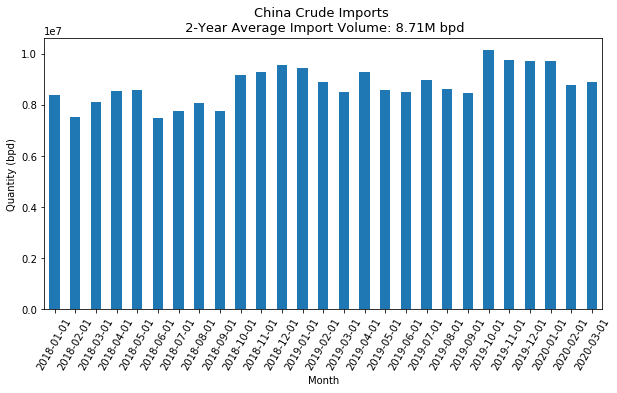

In [7]:
# Plot the data
df['bpd'].plot(kind='bar', figsize = (10,5))
plt.xticks(rotation = 60)
plt.title('China Crude Imports \n 2-Year Average Import Volume: {:,}M bpd'.
              format(round(df['bpd'][:-3].mean() / 10**6, 2)), fontsize=13)
plt.ylabel('Quantity (bpd)')
plt.xlabel('Month')

March seaborne crude imports into China seem steady at **8.91M bpd**, very close to the **8.77M bpd** of February and to the 2-year historical average (Jan 2018 - Dec 2019) of **8.71M bpd** (note that China also imports crude via pipeline). The data make sense intuitively, since February/March China arrivals are cargoes that have been bought and loaded at least one or two months before, a period when the coronovirus pandemic hadn't yet escalated at its full extent. The real impact of the pandemic is expected to be seen from April and onward.<br><br> Let’s also look at the main **suppliers** of China, and how their exports have been fared. We will focus on *MEG/AG, West Africa, South America East Coast and Russia Far East* trading regions. Please note that MEG exports include the port of *Ceyhan* due to the *Kirkuk* Iraqi exports and exclude movements loading from Saudi *Arabia Red Sea* region.

In [8]:
# Find region IDs 
meg = [g.id for g in Geographies().search('MEG').to_list() if 'shipping_region' in g.layer]
waf = [g.id for g in Geographies().search('West Africa').to_list() if 'shipping_region' in g.layer]
saec = [g.id for g in Geographies().search('South America East').to_list() if 'trading_region' in g.layer]
russia = [g.id for g in Geographies().search('Russia Far').to_list() if 'trading_region' in g.layer]
suppliers = meg + waf + saec + russia

# Ensure we've only got one ID for the desired regions
assert len(meg) == 1
assert len(waf) == 1
assert len(saec) == 1
assert len(russia) == 1

# Create a dictionary to map region ids to names. This will be useful when we will combine the results from
# different queries to a single DataFrame
suppliers_dict = {meg[0]: 'MEG/AG',
                  waf[0]: 'West Africa',
                  saec[0]: 'South America East Coast',
                  russia[0]: 'Russia Far East'}

2020-04-15 12:25:14,993 vortexasdk.operations — INFO — Searching Geographies with params: {'term': ['MEG']}
2020-04-15 12:25:15,125 vortexasdk.client — INFO — 4 Results to retreive. Sending 1 post requests in parallel using 6 threads.
2020-04-15 12:25:15,483 vortexasdk.operations — INFO — Searching Geographies with params: {'term': ['West Africa']}
2020-04-15 12:25:15,618 vortexasdk.client — INFO — 3 Results to retreive. Sending 1 post requests in parallel using 6 threads.
2020-04-15 12:25:15,980 vortexasdk.operations — INFO — Searching Geographies with params: {'term': ['South America East']}
2020-04-15 12:25:16,754 vortexasdk.operations — INFO — Searching Geographies with params: {'term': ['Russia Far']}


We will now make separate API calls for each origin (i.e. China supplier) and store the results for all suppliers to a single DataFrame.

In [9]:
# Create an empty list. After each API call the resulting DataFrame will be appended to this list. At the end,
# the DataFrames of the list will be concatenated to create a single DataFrame
df_list = []

# Iterate through China crude suppliers
for p in suppliers:
    print('Loading China crude imports from {}'.format(suppliers_dict[p]))
    dfp = CargoTimeSeries().search(
                # Filter on cargo arrival date (i.e. the date that the unloading operation started)
                filter_activity = 'unloading_start',
                # At each iteration use a different origin
                filter_origins = p,
                # We are only interested in movements into China
                filter_destinations = china,
                # Keep only Crude/Condensate movements
                filter_products = crude, 
                # Quantity unit to use
                timeseries_unit = TS_UNIT,
                # Look on monthly imports
                timeseries_frequency = TS_FREQ,
                # Set the date range of analysis
                filter_time_min = START_DATE,
                filter_time_max = END_DATE).\
            to_df()
    dfp['key'] = pd.to_datetime(dfp['key']).dt.date
    dfp = dfp.drop(columns = 'count')
    dfp = dfp.rename(columns = {'key': 'date', 'value': '{}'.format(suppliers_dict[p])})
    dfp = dfp.set_index('date')
    df_list.append(dfp)
    print('-----------------------------------------------------------------------------------')

# Concatenate DataFrames 
df_supl = pd.concat(df_list, axis=1)
df_supl = round(df_supl).astype(int)
df_supl.tail()

Loading China crude imports from MEG/AG
2020-04-15 12:25:17,032 vortexasdk.operations — INFO — Searching CargoTimeSeries with params: {'timeseries_frequency': 'month', 'timeseries_unit': 'bpd', 'timeseries_activity': 'unloading_start', 'filter_activity': 'unloading_start', 'filter_time_min': '2018-01-01T00:00:00.000Z', 'filter_time_max': '2020-03-31T23:59:59.000Z', 'size': 500, 'filter_charterers': [], 'filter_owners': [], 'filter_products': ['54af755a090118dcf9b0724c9a4e9f14745c26165385ffa7f1445bc768f06f11'], 'filter_vessels': [], 'filter_destinations': ['934c47f36c16a58d68ef5e007e62a23f5f036ee3f3d1f5f85a48c572b90ad8b2'], 'filter_origins': ['0899599f74faadb7ba7eb65205ee5c20cb434367a6e7203bc274d310cdb54754'], 'filter_storage_locations': [], 'filter_ship_to_ship_locations': [], 'filter_waypoints': [], 'disable_geographic_exclusion_rules': None, 'timeseries_activity_time_span_min': None, 'timeseries_activity_time_span_max': None}
----------------------------------------------------------

,MEG/AG,West Africa,South America East Coast,Russia Far East
date,,,,
2019-11-01,5020461,1440984,1042541,532488
2019-12-01,4145689,1747375,865083,628031
2020-01-01,4659045,1235428,1212141,756810
2020-02-01,4308542,1297303,1088467,488932
2020-03-01,4355388,1487335,800464,513588


In [10]:
# Calculate 2-year (Jan 2018 to Dec 2019) historical average exports volume per origin
round(df_supl[:-3].mean().to_frame().rename(columns={0: 'avg_bpd'})).astype(int)

,avg_bpd
MEG/AG,4071010
West Africa,1480773
South America East Coast,988752
Russia Far East,568111


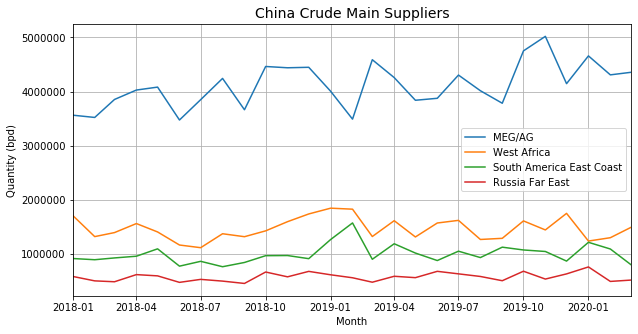

In [11]:
# Plot the data
df_supl.plot(figsize=(10,5))
plt.title('China Crude Main Suppliers', fontsize=14)
plt.ylabel('Quantity (bpd)')
plt.xlabel('Month')
plt.grid()

Text(0.5, 0, 'Month')

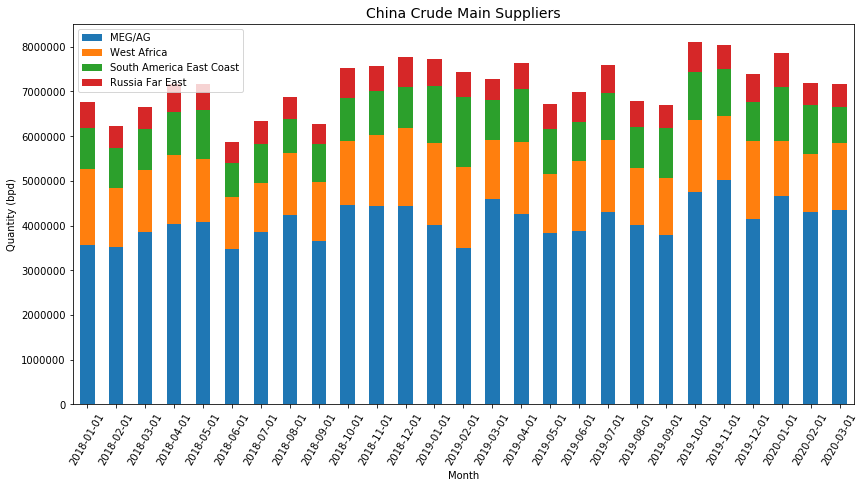

In [12]:
# Alternative way to visualize data: Create a stacked barplot
df_supl[list(suppliers_dict.values())].plot.bar(stacked=True, figsize = (14,7))
plt.xticks(rotation = 60)
plt.title('China Crude Main Suppliers', fontsize=14)
plt.ylabel('Quantity (bpd)')
plt.xlabel('Month')

*MEG, West African and Russian Far East* seaborne crude arrivals to China also look steady and close to their historical averages of approximately **4.1M bpd**, **1.48M bpd** and **570k bpd** respectively. On the other hand, arrivals from *South America East Coast* stood at ~**1.1M bpd** on February, a **10%** decrease compared to January numbers, to be followed by a further **26.5%** decrease in March, standing at **800k bpd**.

# China Clean Exports

Let's move on now to explore China exports on clean products. To make the export analysis compatible with the most commonly used benchmark data, instead of using `China` as origin, we will use `China (excl. HK & Macau)`. We will focus our analysis to the following products: *Gasoline/Blending Components, Jet/Kero and Diesel/Gasoil*.

In [13]:
# Find China exl HK & Macau ID
china_excl = [g.id for g in Geographies().search('China (excl. HK & Macau)').to_list()]

# Check we've only got one ID
assert len(china_excl) == 1

2020-04-15 12:25:19,337 vortexasdk.operations — INFO — Searching Geographies with params: {'term': ['China (excl. HK & Macau)']}


In [14]:
# Find product IDs
gasoline = [p.id for p in Products().search('Gasoline/Blending Components').to_list() if p.layer[0] == 'group_product']
jet_kero = [p.id for p in Products().search('Jet/Kero').to_list() if p.layer[0] == 'group_product']
diesel_gasoil = [p.id for p in Products().search('Diesel/Gasoil').to_list() if p.layer[0] == 'group_product']
clean_products = gasoline + jet_kero + diesel_gasoil

# Ensure we've only got one ID for the desired clean products
assert len(gasoline) == 1
assert len(jet_kero) == 1
assert len(diesel_gasoil) == 1

# Create a dictionary to map product ids to names
products_dict = {gasoline[0]: 'Gasoline/Blending Components',
                 jet_kero[0]: 'Jet/Kero',
                 diesel_gasoil[0]: 'Diesel/Gasoil'}

2020-04-15 12:25:19,633 vortexasdk.operations — INFO — Searching Products with params: {'term': ['Gasoline/Blending Components'], 'ids': [], 'product_parent': [], 'allowTopLevelProducts': True}
2020-04-15 12:25:19,900 vortexasdk.operations — INFO — Searching Products with params: {'term': ['Jet/Kero'], 'ids': [], 'product_parent': [], 'allowTopLevelProducts': True}
2020-04-15 12:25:20,064 vortexasdk.client — INFO — 3 Results to retreive. Sending 1 post requests in parallel using 6 threads.
2020-04-15 12:25:20,458 vortexasdk.operations — INFO — Searching Products with params: {'term': ['Diesel/Gasoil'], 'ids': [], 'product_parent': [], 'allowTopLevelProducts': True}
2020-04-15 12:25:20,582 vortexasdk.client — INFO — 2 Results to retreive. Sending 1 post requests in parallel using 6 threads.


Now we will apply a similar logic and make consecutive API calls, but this time origin and destination will be fixed and product will change at each iteration.

In [15]:
# Apply same logic as with Crude Suppliers
df_list_2 = []

# Iterate through all products
for p in clean_products:
    print('Loading China {} exports'.format(products_dict[p]))
    dfc = CargoTimeSeries().search(
                # We look on exports, therefore we will filter on cargo deparure date (i.e. the date where the loading operation was completed)
                filter_activity = 'loading_end',
                # Will now use China exl HK & Macau instead of China
                filter_origins = china_excl,
                # At each iteration an API call for a different product will be made
                filter_products = p,  
                # Keep same unit as before
                timeseries_unit = TS_UNIT,
                # Look on monthly exports
                timeseries_frequency = TS_FREQ,
                # Keep same date range
                filter_time_min = START_DATE,
                filter_time_max = END_DATE).\
            to_df()
    dfc['key'] = pd.to_datetime(dfc['key']).dt.date
    dfc = dfc.drop(columns = 'count')
    dfc = dfc.rename(columns = {'key': 'date', 'value': '{}'.format(products_dict[p])})
    dfc = dfc.set_index('date')
    df_list_2.append(dfc)
    print('-----------------------------------------------------------------------------------')

# Concatenate results    
df_clean = pd.concat(df_list_2, axis=1)

# Calculate total clean exports
df_clean['total'] = df_clean.sum(axis=1)

# Round results
df_clean = round(df_clean).astype(int)

df_clean.tail()

Loading China Gasoline/Blending Components exports
2020-04-15 12:25:20,949 vortexasdk.operations — INFO — Searching CargoTimeSeries with params: {'timeseries_frequency': 'month', 'timeseries_unit': 'bpd', 'timeseries_activity': 'loading_end', 'filter_activity': 'loading_end', 'filter_time_min': '2018-01-01T00:00:00.000Z', 'filter_time_max': '2020-03-31T23:59:59.000Z', 'size': 500, 'filter_charterers': [], 'filter_owners': [], 'filter_products': ['9256907ba7e4ed11ff03aa297a7e62e14484ce5a85c8118c7495b9120ad0e268'], 'filter_vessels': [], 'filter_destinations': [], 'filter_origins': ['b5fafce6e20de2dc307fb7e0b89978ee91a49a7b6ec6f5461daf2633f3c56674'], 'filter_storage_locations': [], 'filter_ship_to_ship_locations': [], 'filter_waypoints': [], 'disable_geographic_exclusion_rules': None, 'timeseries_activity_time_span_min': None, 'timeseries_activity_time_span_max': None}
-----------------------------------------------------------------------------------
Loading China Jet/Kero exports
2020-0

,Gasoline/Blending Components,Jet/Kero,Diesel/Gasoil,total
date,,,,
2019-11-01,493205,267994,376318,1137517
2019-12-01,435618,332784,412341,1180742
2020-01-01,317788,290461,453342,1061591
2020-02-01,419214,264927,504993,1189134
2020-03-01,390066,293114,514857,1198037


In [16]:
# Calculate 2-year (Jan 2018 to Dec 2019) historical average exports volume per product
round(df_clean[:-3].mean().to_frame().rename(columns={0: 'avg_bpd'})).astype(int)

,avg_bpd
Gasoline/Blending Components,342000
Jet/Kero,202396
Diesel/Gasoil,356605
total,901001


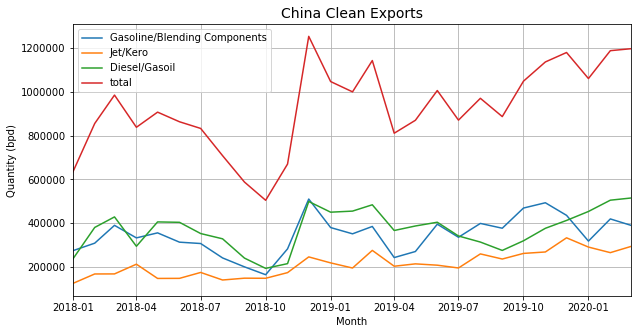

In [17]:
# Plot the data
df_clean.plot(figsize=(10,5))
plt.title('China Clean Exports', fontsize=14)
plt.ylabel('Quantity (bpd)')
plt.xlabel('Month')
plt.grid()

Text(0.5, 0, 'Month')

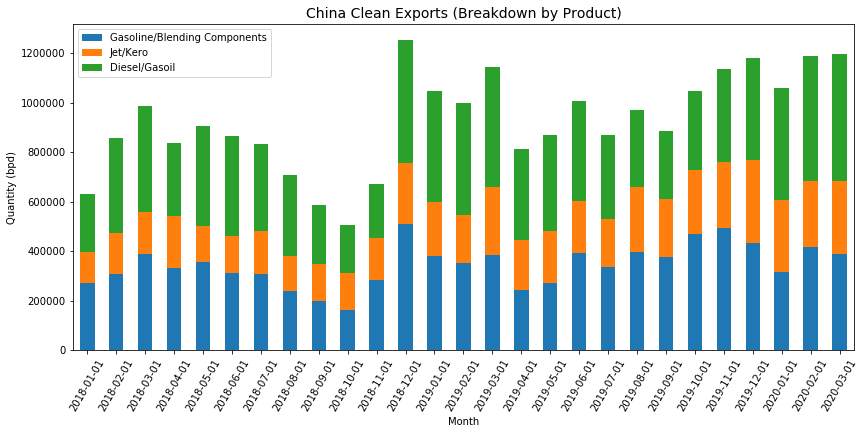

In [18]:
# Alternative way to visualize data: Create a stacked barplot
df_clean[list(products_dict.values())].plot.bar(stacked=True, figsize = (14,6))
plt.xticks(rotation = 60)
plt.title('China Clean Exports (Breakdown by Product)', fontsize=14)
plt.ylabel('Quantity (bpd)')
plt.xlabel('Month')

While we see a lag on the coronavirus impact on China's crude imports, the impact on clean product exports is more immediate. **Diesel** exports showed an uptick from Oct 2019 reaching a 2-year high at **~515k bpd** on March, a **31%** increase compared to the (2-year) historical average of **357k bpd**. March **Gasoline** and **Jet/Kero** exports held steady at **390k bpd** and **290k bpd** respectively, both matching February levels.

Finally, to finish our analysis, let's look at the historical trend of the main **destinations** for the Chinese *Diesel/Gasoil* exports. This time we won't look at regions, but we will explore results on a *country* level. More specifically, we will focus on exports to *Phillipines, Australia and Singapore*.

In [19]:
# Find country IDs
philli = [g.id for g in Geographies().search('Philippines').to_list() if 'country' in g.layer]
australia = [g.id for g in Geographies().search('Australia').to_list() if 'country' in g.layer]
singapore = [g.id for g in Geographies().search('Singapore').to_list() if 'country' in g.layer]
receivers = philli + australia + singapore

# Ensure we've only got one ID for the desired countries
assert len(philli) == 1
assert len(australia) == 1
assert len(singapore) == 1

# Create a dictionary to map country ids to names. This will be useful when plotting the results
receivers_dict = {philli[0]: 'Philippines',
                  australia[0]: 'Australia',
                  singapore[0]: 'Singapore'}

2020-04-15 12:25:22,368 vortexasdk.operations — INFO — Searching Geographies with params: {'term': ['Philippines']}
2020-04-15 12:25:22,483 vortexasdk.client — INFO — 3 Results to retreive. Sending 1 post requests in parallel using 6 threads.
2020-04-15 12:25:22,843 vortexasdk.operations — INFO — Searching Geographies with params: {'term': ['Australia']}
2020-04-15 12:25:22,969 vortexasdk.client — INFO — 5 Results to retreive. Sending 1 post requests in parallel using 6 threads.
2020-04-15 12:25:23,329 vortexasdk.operations — INFO — Searching Geographies with params: {'term': ['Singapore']}
2020-04-15 12:25:23,447 vortexasdk.client — INFO — 24 Results to retreive. Sending 1 post requests in parallel using 6 threads.


In [20]:
# Create an empty list. After each API call the resulting DataFrame will be appended to this list. At the end
# the DataFrames of the list will just be concatenated to create a single DataFrame
df_list_3 = []

# Iterate through all destinations
for p in receivers:
    print('Loading China diesel/gasoil exports to {}'.format(receivers_dict[p]))
    dfp = CargoTimeSeries().search(
                # Filter on cargo deparure date
                filter_activity = 'loading_end',
                # Will again use China exl HK & Macau instead of China
                filter_origins = china_excl,
                # At each iteration an API call for a different destination will be made
                filter_destinations = p,
                # Look only at Diesel/F=Gasoil exports
                filter_products = diesel_gasoil, 
                # Keep same quantity as before
                timeseries_unit = TS_UNIT,
                # Look at monthly exports
                timeseries_frequency = TS_FREQ,
                # Keep same date range as before
                filter_time_min = START_DATE,
                filter_time_max = END_DATE).\
            to_df()
    dfp['key'] = pd.to_datetime(dfp['key']).dt.date
    dfp = dfp.drop(columns = 'count')
    dfp = dfp.rename(columns = {'key': 'date', 'value': '{}'.format(receivers_dict[p])})
    dfp = dfp.set_index('date')
    df_list_3.append(dfp)
    print('-----------------------------------------------------------------------------------')

# Concatenate DataFrames 
df_receiv = pd.concat(df_list_3, axis=1)
df_receiv = round(df_receiv).astype(int)
df_receiv.tail()

Loading China diesel/gasoil exports to Philippines
2020-04-15 12:25:23,821 vortexasdk.operations — INFO — Searching CargoTimeSeries with params: {'timeseries_frequency': 'month', 'timeseries_unit': 'bpd', 'timeseries_activity': 'loading_end', 'filter_activity': 'loading_end', 'filter_time_min': '2018-01-01T00:00:00.000Z', 'filter_time_max': '2020-03-31T23:59:59.000Z', 'size': 500, 'filter_charterers': [], 'filter_owners': [], 'filter_products': ['deda35eb9ca56b54e74f0ff370423f9a8c61cf6a3796fcb18eaeeb32a8c290bb'], 'filter_vessels': [], 'filter_destinations': ['065aab207e6fe875caf93419bd6cfedcbb0933098c75e52a6702b75bdfe71c53'], 'filter_origins': ['b5fafce6e20de2dc307fb7e0b89978ee91a49a7b6ec6f5461daf2633f3c56674'], 'filter_storage_locations': [], 'filter_ship_to_ship_locations': [], 'filter_waypoints': [], 'disable_geographic_exclusion_rules': None, 'timeseries_activity_time_span_min': None, 'timeseries_activity_time_span_max': None}
-------------------------------------------------------

,Philippines,Australia,Singapore
date,,,
2019-11-01,62138,74625,46324
2019-12-01,108409,60698,25452
2020-01-01,39039,26275,85208
2020-02-01,45258,54056,101426
2020-03-01,62362,59765,100948


In [21]:
# Calculate 2-year (Jan 2018 to Dec 2019) historical average Diesel/Gasoil exports volume per country destination
round(df_receiv[:-3].mean().to_frame().rename(columns={0: 'avg_bpd'})).astype(int)

,avg_bpd
Philippines,64144
Australia,48511
Singapore,29088


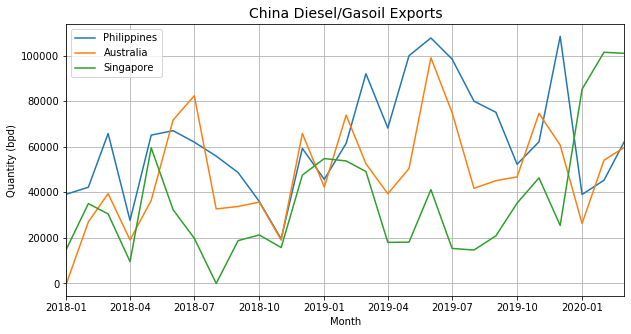

In [22]:
# Plot the data
df_receiv.plot(figsize=(10,5))
plt.title('China Diesel/Gasoil Exports', fontsize=14)
plt.ylabel('Quantity (bpd)')
plt.xlabel('Month')
plt.grid()

From the above graph, we see a large increase in China's **Diesel/Gasoil** exports heading towards *Singapore*, cargoes that will be used for *storage* purposes. Exports to Singapore have been steadily rising since January reaching a two-year high of close to **100k bpd** in February and March, more than 3-times higher compared to the historical (2-year) average of **29k bpd** and a **300%** increase compared to the **25k bpd** of December 2019.

# Conclusion

That’s a very quick overview of how coronavirus is currently impacting China’s crude and clean products flows. As noted above, there are many important signals already evident in the data that tell us about how the situation could unfold in the coming months. Especially on the crude side, the datasets can additionally be blended with analysis of floating storage data – another leading indicator that will be watched given the current shape of the oil forward curve. Stay tuned and read on to take a look at our upcoming **Floating Storage analysis** using the SDK and the related **Webinars**. 